# Multiple Linear Regression


Multiple linear regression is used to estimate the relationship between two or more independent variables and one dependent variable. You can use multiple linear regression when you want to know:

1. How strong the relationship is between two or more independent variables and one dependent variable (e.g. how rainfall, temperature, and amount of fertilizer added affect crop growth).

2. The value of the dependent variable at a certain value of the independent variables (e.g. the expected yield of a crop at certain levels of rainfall, temperature, and fertilizer addition).

It is just like the simple linear regression but in here corralation between the features and the dependent values are much more complex. Even though it is much more complex general structure of our code is not change much.

When working with the multiple linear fetures there may be some problems. First, there may be any categorical value. As we know from before section, we have to encode our categorical datas. When we do that, if we hat 3 different categorical data we have to add 3 columns to our data set due to the onehotencoding method. If we put all the categorical encoded columns to our x_train data set there will be an error which is called as "Dummy trap"(https://www.geeksforgeeks.org/ml-dummy-variable-trap-in-regression-models/). We have to take care of this error it may cause of prediction errors. Another problem is that there may also be groups of data that are less statistically significant. To check this we have to look our data groups "P" value. To solve such problems we have several thecniques.

1. All-in
2. Backward Elimination
3. Forward Elimination
4. Bidirectional Elimination
5. Score Comparison

2, 3 and 4 are called as Stepwise Regression. Luckly scikit_learn module has class that LinearRegression which has amazing methods and tools that can solve the dummy trap and the last problem which we have spoken.


## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv("50_Startups.csv")
x = dataset.iloc[:, :-1].values # features
y = dataset.iloc[:, -1].values # dependent values

## Encoding categorical data

We have number of categorical values so we'll encode this column.

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [3])], remainder=("passthrough"))
x = np.array(ct.fit_transform(x))

## Splitting the dataset into the Training set and Test set

In multiple linear regression the equation will be like y = b0 + b1X + b2X + b3X... As you may see all the features have it's own coefficient because of that we don't need to do feature scaling.

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

Numpy LinearRegression class has amazing tools and methods that can solve automatically "dummy trap" and can implement best feature to our model.

In [5]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

## Predicting the Test set results

Since there are several features which has some correlation, we can't easily plot our data set's result. To see our models success we will print them together as a matrix.

In [6]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision = 2) # precision after . is 2
np.set_printoptions(suppress = True) #numpy array won't be printed with scientific notation
# we will reshape and concatenate our y_test and y_pred vectors
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)), 1))

[[103282.38 103015.2 ]
 [144259.4  132582.28]
 [146121.95 132447.74]
 [ 77798.83  71976.1 ]
 [191050.39 178537.48]
 [105008.31 116161.24]
 [ 81229.06  67851.69]
 [ 97483.56  98791.73]
 [110352.25 113969.44]
 [166187.94 167921.07]]


## 1. In order to better see the success of our model clearer, we will calculate how many percent wrong each prediction is and add it to our prediction matrix.

In [7]:
errors = []
for i in range(len(y_pred)):
    errors.append(((y_test[i]-y_pred[i])*100/y_test[i]))
np_errors = np.array(errors).reshape(len(errors),1)


In [8]:
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1),np_errors), 1))

[[103282.38 103015.2       0.26]
 [144259.4  132582.28      8.09]
 [146121.95 132447.74      9.36]
 [ 77798.83  71976.1       7.48]
 [191050.39 178537.48      6.55]
 [105008.31 116161.24    -10.62]
 [ 81229.06  67851.69     16.47]
 [ 97483.56  98791.73     -1.34]
 [110352.25 113969.44     -3.28]
 [166187.94 167921.07     -1.04]]


## 2. For a second method we can display our y_test and y_pred on scatter graph

To do this we will create an array with the exact sample count len(y_pred)=len(y_test). We will also use this array instead of x in the first argument that the scatter function expects. Thus, we will have given a variable that can replace x in y=b0+b1x to the function. We will plot the y_pred and y_test values along with the changing x values. If the blue and red dots match, the values are predicted with a slight error.

The function definition is below

In [9]:
def disp_pred_and_test(y_pred, y_test):
    x = list(range(len(errors)))
    plt.scatter(x, y_pred, color = "red")
    plt.scatter(x, y_test, color = "blue")
    plt.show()

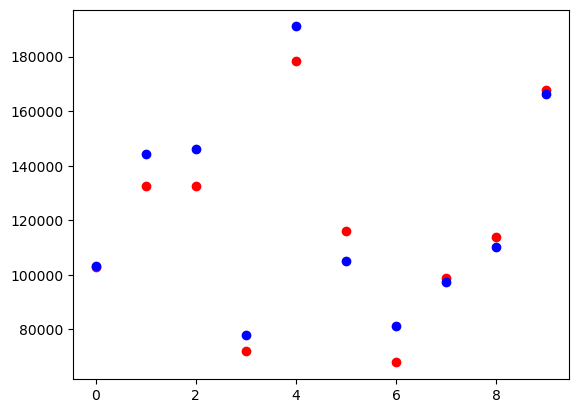

In [10]:
disp_pred_and_test(y_pred, y_test)

## Making a single prediction (for example the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = 'California')

In [11]:
print(regressor.predict([[1, 0, 0, 160000, 130000, 300000]]))

[181566.92]


Therefore, our model predicts that the profit of a Californian startup which spent 160000 in R&D, 130000 in Administration and 300000 in Marketing is $ 181566,92.

**Important note:** Notice also that the "California" state was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the second row of the matrix of features X, "California" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, not the last three ones, because the dummy variables are always created in the first columns.

## Getting the final linear regression equation with the values of the coefficients

In [12]:
print(regressor.coef_)
print(regressor.intercept_)

[  86.64 -872.65  786.01    0.77    0.03    0.04]
42467.529248581035


Therefore, the equation of our multiple linear regression model is:

Profit=86.6×Dummy State 1−873×Dummy State 2+786×Dummy State 3+0.773×R&D Spend+0.0329×Administration+0.0366×Marketing Spend+42467.53

Important Note: To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.